<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/okno/OKNO_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# przygotowanie katalogu roboczego do pracy :)
import requests

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['cars.csv']
for nazwa in nazwyPlikow:
  pobierzPlik("https://raw.githubusercontent.com/rroszczyk/Python/master/Pliki/"+nazwa, nazwa)

# Eksploracyjna analiza danych w Pythonie.

## 1. Importowanie wymaganych bibliotek do Eksploracyjnej Analizy Danych

Poniżej znajdują się biblioteki używane do przeprowadzenia EDA (Eksploracyjnej Analizy Danych) w tym samouczku.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns                       #wizualizacja
import matplotlib.pyplot as plt             #wizualizacja
%matplotlib inline
sns.set(color_codes=True)



---



## 2. Wczytywanie danych do ramki danych.

Wczytanie danych do ramki danych pandas jest z pewnością jednym z najważniejszych kroków w EDA. Jak widać, wartości w zbiorze danych są oddzielone przecinkami. Wystarczy więc wczytać plik CSV do ramki danych, a ramka danych pandas wykona za nas to zadanie.

Aby pobrać lub załadować zbiór danych do notatnika, wykonałem jeden prosty krok. W Google Colab po lewej stronie notatnika znajdziesz symbol > (większy niż). Po kliknięciu pojawi się karta z trzema opcjami, wystarczy wybrać "Pliki". Następnie można łatwo przesłać plik za pomocą opcji "Prześlij". Nie ma potrzeby montowania dysku Google ani używania żadnych specjalnych bibliotek – wystarczy przesłać zbiór danych i gotowe. Warto pamiętać, że przesłane pliki zostaną usunięte po ponownym uruchomieniu tego środowiska wykonawczego. W ten sposób wprowadziłem zbiór danych do notatnika.

In [61]:
df = pd.read_csv("cars.csv")
# Aby wyświetlić 5 pierwszych wierszy
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [62]:
df.tail(5)                        # Aby wyświetlić 5 ostatnich wierszy

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## 3. Sprawdzanie typów danych

Tutaj sprawdzamy typy danych, ponieważ czasami MSRP (sugerowana cena detaliczna producenta) lub cena samochodu mogą być przechowywane jako ciąg znaków. W takim przypadku musimy przekonwertować ten ciąg na dane typu całkowitoliczbowego, aby móc przedstawić dane na wykresie. W tym przypadku dane są już w formacie całkowitoliczbowym, więc nie ma powodu do obaw.

In [63]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object




---



## 4. Usuwanie nieistotnych kolumn

Ten krok jest z pewnością potrzebny w każdej eksploracyjnej analizie danych, ponieważ czasami pojawia się wiele kolumn, których nigdy nie używamy. W takich przypadkach usunięcie jest jedynym rozwiązaniem. W tym przypadku kolumny takie jak 'Engine Fuel Type', 'Market Category', 'Vehicle style', 'Popularity', 'Number of doors', 'Vehicle Size' nie mają dla mnie większego sensu, więc na potrzeby tego przykładu po prostu je usunąłem.

In [64]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 5. Zmiana nazw kolumn

W tym przypadku większość nazw kolumn jest bardzo myląca w odczycie, więc po prostu je zmodyfikowałem. To dobre podejście, które poprawia czytelność zbioru danych.

In [65]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 6. Usuwanie zduplikowanych wierszy

To często przydatna czynność, ponieważ duży zbiór danych, jak w tym przypadku, zawierający ponad 10 000 wierszy, często ma pewne zduplikowane dane, które mogą być problematyczne. Dlatego tutaj usuwam wszystkie zduplikowane wartości ze zbioru danych. Na przykład, przed usunięciem miałem 11914 wierszy danych, ale po usunięciu duplikatów zostało 10925 danych, co oznacza, że miałem 989 zduplikowanych danych.

In [66]:
df.shape

(11914, 10)

In [67]:
duplicate_rows_df = df[df.duplicated()]
print("liczba zduplikowanych wierszy: ", duplicate_rows_df.shape)

liczba zduplikowanych wierszy:  (989, 10)


Teraz usuńmy zduplikowane dane, ponieważ można to zrobić bez obaw.

In [68]:
df.count()      # Służy do zliczania liczby wierszy

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


Jak widać powyżej, jest 11914 wierszy, a my usuwamy 989 zduplikowanych wierszy.

In [69]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [70]:
df.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925




---



## 7. Usuwanie brakujących lub pustych wartości (null).

To jest w dużej mierze podobne do poprzedniego kroku, ale tutaj wszystkie brakujące wartości są wykrywane, a następnie usuwane. Nie jest to jednak najlepsze podejście, ponieważ wiele osób po prostu zastępuje brakujące wartości średnią arytmetyczną lub medianą tej kolumny. W tym przypadku jednak po prostu usunąłem te brakujące wartości. Jest tak, ponieważ jest prawie 100 brakujących wartości w porównaniu do 10 000 wartości – jest to niewielka liczba i można ją pominąć, więc po prostu je usunąłem.

In [71]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


To jest powód, dla którego w powyższym kroku, podczas zliczania, zarówno Cylindry, jak i Moc (HP) miały odpowiednio 10856 i 10895 z 10925 wierszy.

In [72]:
df = df.dropna()    # Usuwanie brakujących wartości.
df.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


Teraz usunęliśmy wszystkie wiersze, które zawierają wartości Null lub N/A (Cylindry i Moc (HP)).

In [73]:
print(df.isnull().sum())   # Po usunięciu wartości

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64




---



## 8. Wykrywanie wartości odstających

Wartość odstająca to punkt lub zbiór punktów, które różnią się od pozostałych punktów. Czasami mogą być bardzo wysokie lub bardzo niskie. Często dobrym pomysłem jest wykrycie i usunięcie wartości odstających, ponieważ są one jedną z głównych przyczyn uzyskiwania mniej dokładnego modelu. Dlatego warto je usunąć. Wykrywanie i usuwanie wartości odstających, które zamierzam przeprowadzić, nazywa się techniką opartą na rozstępie międzykwartylowym (IQR). Wartości odstające często można zobaczyć za pomocą wizualizacji, używając wykresu pudełkowego. Poniżej przedstawiono wykresy pudełkowe dla MSRP, cylindrów, mocy i pojemności silnika. Na wszystkich wykresach można zauważyć punkty znajdujące się poza pudełkiem – są to właśnie wartości odstające.

<Axes: xlabel='Price'>

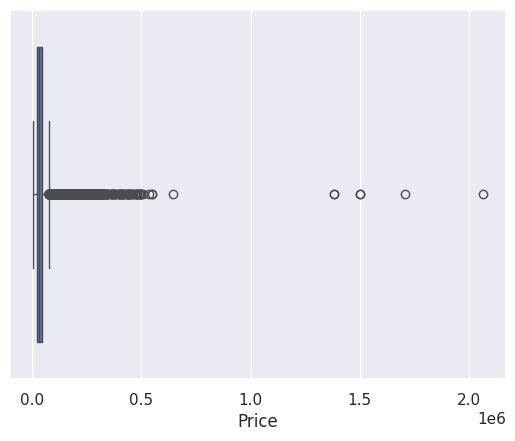

In [74]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

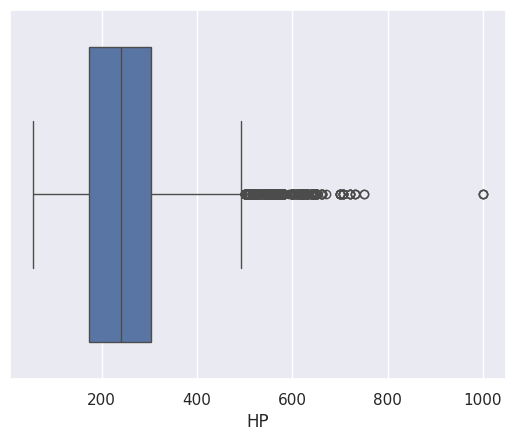

In [75]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

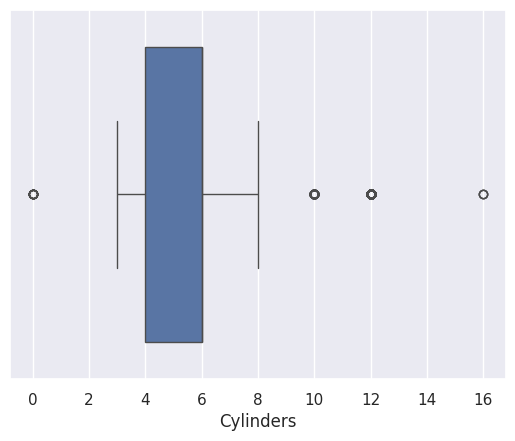

In [76]:
sns.boxplot(x=df['Cylinders'])

In [77]:
dfn = df.select_dtypes(include=['number'])

Q1 = dfn.quantile(0.25)
Q3 = dfn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


Nie martw się powyższymi wartościami, ponieważ nie jest istotne, aby znać każdą z nich. Ważne jest, aby wiedzieć, jak użyć tej techniki w celu usunięcia wartości odstających.

In [78]:
dfn = dfn[~((dfn < (Q1 - 1.5 * IQR)) |(dfn > (Q3 + 1.5 * IQR))).any(axis=1)]
dfn.shape

(9191, 6)

Jak widać powyżej, było około 1600 wierszy z wartościami odstającymi. Nie można jednak całkowicie usunąć wartości odstających, ponieważ nawet po zastosowaniu powyższej techniki może pozostać 1–2 nieusuniętych wartości odstających, ale to w porządku, ponieważ było ich ponad 100. Coś jest lepsze niż nic.



---



## 9. Wykresy zależności między różnymi cechami (punktowy) oraz rozkładu (histogram)

### Histogram

Histogram odnosi się do częstotliwości występowania zmiennych w danym przedziale. W tym przypadku mamy głównie 10 różnych firm produkujących samochody, ale często ważne jest, aby wiedzieć, która z nich ma najwięcej samochodów. Aby to zrobić, histogram jest jednym z prostszych rozwiązań, które pozwala nam poznać całkowitą liczbę samochodów wyprodukowanych przez różne firmy.

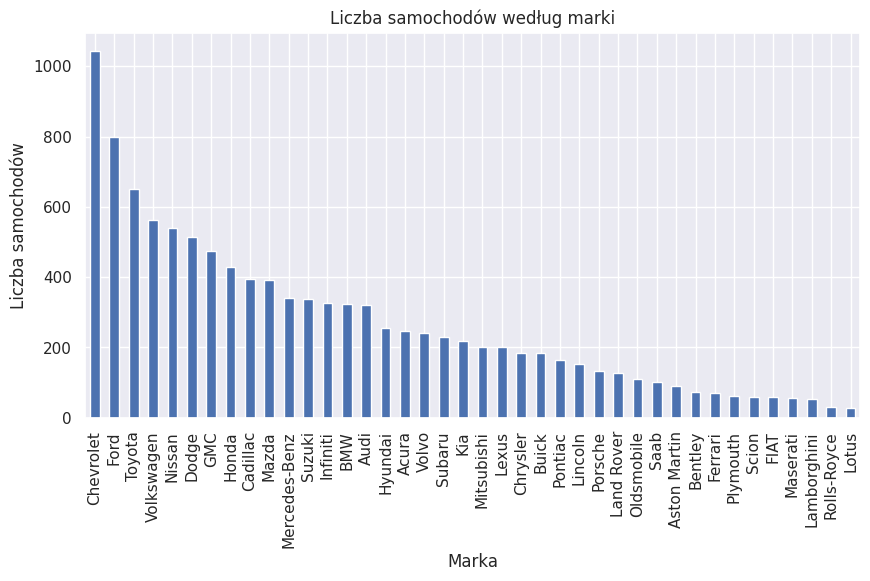

In [79]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Liczba samochodów według marki")
plt.ylabel('Liczba samochodów')
plt.xlabel('Marka');

### Mapy ciepła

Mapy ciepła to rodzaj wykresu, który jest niezbędny, gdy musimy znaleźć zmienne zależne. Jednym z najlepszych sposobów na znalezienie zależności między cechami jest użycie map ciepła. Na poniższej mapie ciepła widzimy, że cecha 'Price' zależy głównie od 'Engine Size', 'Horsepower' i 'Cylinders'.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


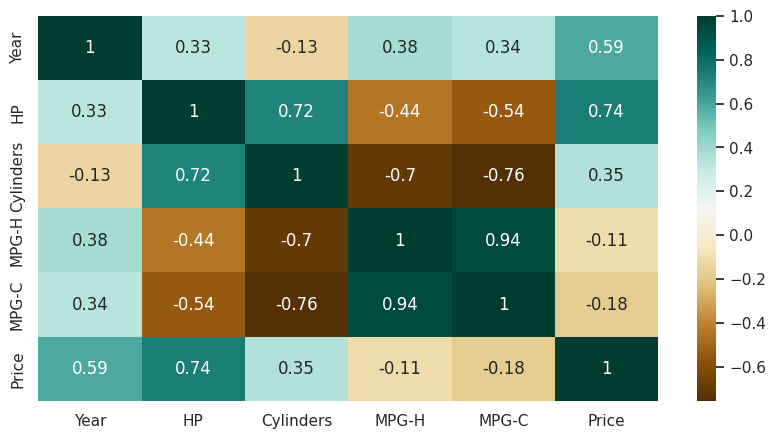

In [80]:
plt.figure(figsize=(10,5))
c= dfn.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Wykres punktowy

Zazwyczaj używamy wykresów punktowych do znajdowania korelacji między dwiema zmiennymi. Tutaj wykresy punktowe przedstawiają zależność między mocą (Horsepower) a ceną (Price), a wykres można zobaczyć poniżej. Na podstawie poniższego wykresu możemy łatwo narysować linię trendu. Te cechy zapewniają dobry rozrzut punktów.

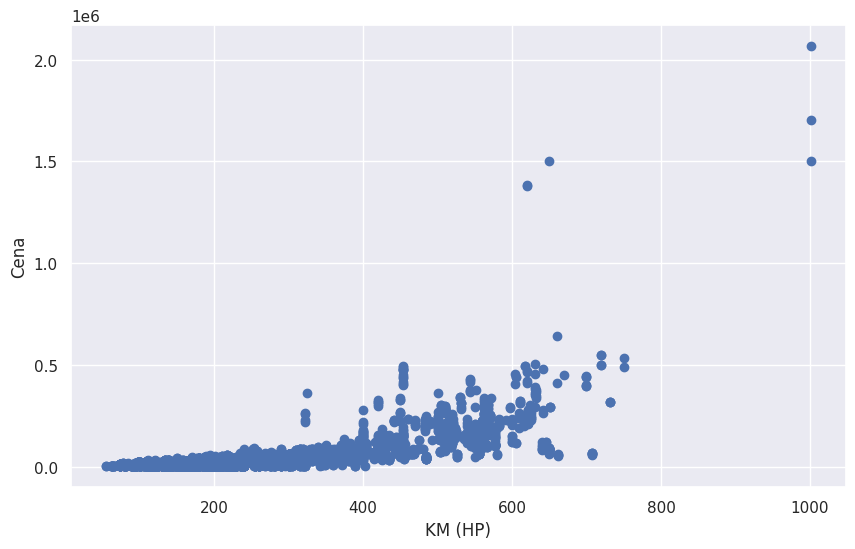

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('KM (HP)')
ax.set_ylabel('Cena')
plt.show()